In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
time=pd.read_csv('Weekly Fuel Prices1620.csv',parse_dates=[0])

In [4]:
time.head()

,Date,Pump Price
0,2016-01-04,106.32
1,2016-01-11,103.41
2,2016-01-18,102.81
3,2016-01-25,101.54
4,2016-02-01,100.84


In [5]:
time1 = time['Pump Price']
time1.head()

0    106.32
1    103.41
2    102.81
3    101.54
4    100.84
Name: Pump Price, dtype: float64

In [6]:
time1.tail()

220    123.41
221    118.60
222    116.83
223    116.15
224    115.73
Name: Pump Price, dtype: float64

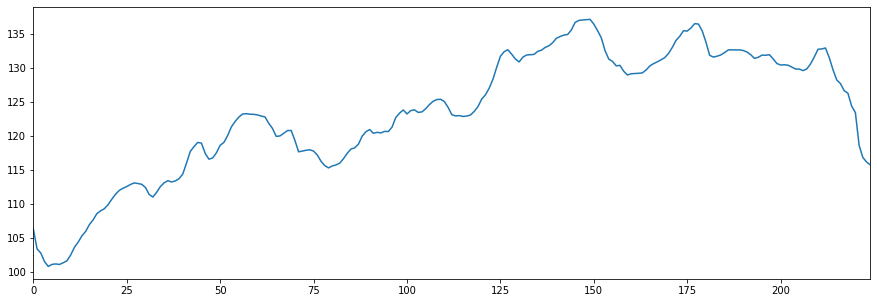

In [7]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

In [8]:
time.shape

(225, 2)

In [9]:
train=time1[0:200] 
test=time1[200:]

In [10]:
test.shape

(25,)

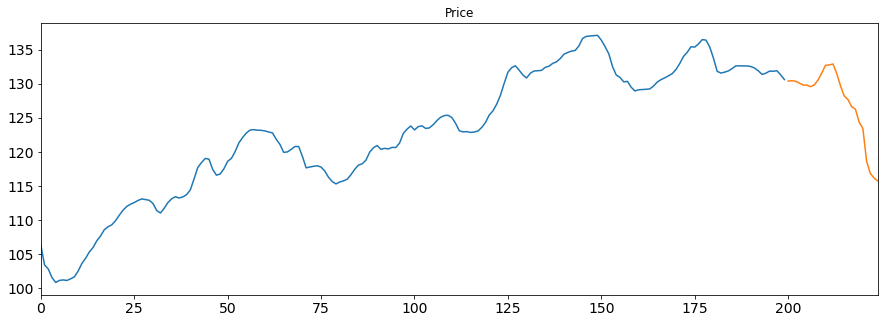

In [11]:
train.plot(figsize=(15,5), title= 'Price', fontsize=14)
test.plot(figsize=(15,5), title= 'Price', fontsize=14)
plt.show()

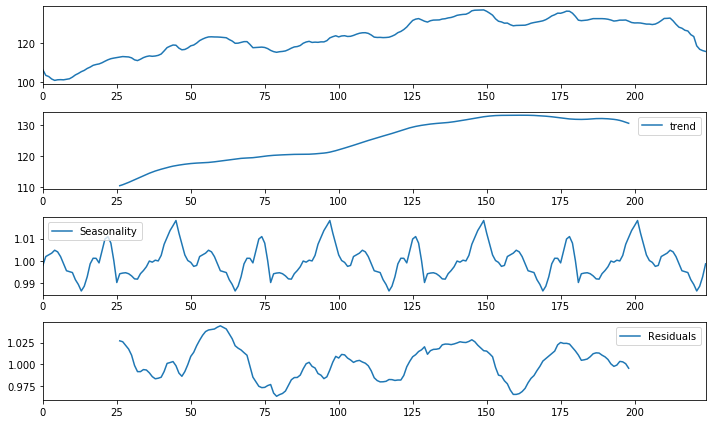

In [12]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [14]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(25)
ses.summary()

Dep. Variable:,endog,No. Observations:,200
Model:,SimpleExpSmoothing,SSE,98.613
Optimized:,True,AIC,-137.422
Trend:,None,BIC,-130.826
Seasonal:,None,AICC,-137.217
Seasonal Periods:,None,Date:,"Thu, 08 Oct 2020"
Box-Cox:,False,Time:,12:49:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,106.32000,l.0,True


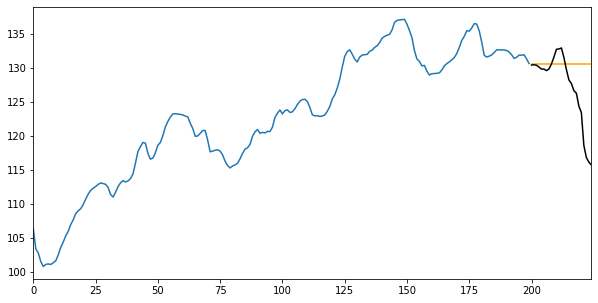

In [15]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [16]:
hes = ExponentialSmoothing(train, trend='add').fit()
hes.summary()

Dep. Variable:,endog,No. Observations:,200
Model:,ExponentialSmoothing,SSE,59.914
Optimized:,True,AIC,-233.083
Trend:,Additive,BIC,-219.890
Seasonal:,None,AICC,-232.648
Seasonal Periods:,None,Date:,"Thu, 08 Oct 2020"
Box-Cox:,False,Time:,12:49:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.9763816,beta,True


In [17]:
hes1 = hes.forecast(25)

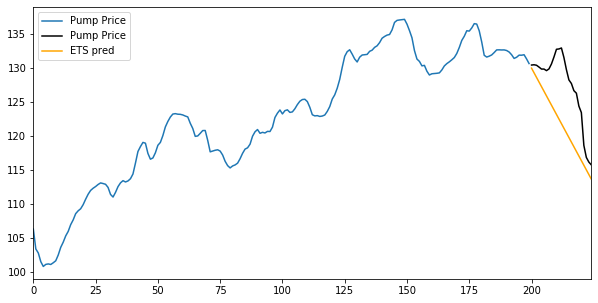

In [18]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [19]:
#HWES
hwes = ExponentialSmoothing(train , seasonal_periods=52 ,trend='add', seasonal="multiplicative").fit()
hwes.summary()

C:\Users\Vivek Dodia\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,200
Model:,ExponentialSmoothing,SSE,255.575
Optimized:,True,AIC,161.040
Trend:,Additive,BIC,345.745
Seasonal:,Multiplicative,AICC,209.579
Seasonal Periods:,52,Date:,"Thu, 08 Oct 2020"
Box-Cox:,False,Time:,12:49:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8947368,alpha,True
smoothing_slope,0.4210505,beta,True


In [20]:
hwes1 = hwes.forecast(25)
#print(hwes1)

In [21]:
#RMSE
print(np.sqrt(mean_squared_error(y_true=test,y_pred=hwes1)))

NameError: name 'mean_squared_error' is not defined

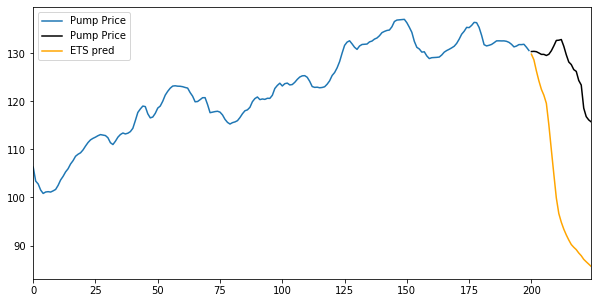

In [22]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [23]:
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=52,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

foraARIMA = model.predict(n_periods=len(test))
foraARIMA = pd.DataFrame(foraARIMA,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(foraARIMA, label='Prediction', color='black')
plt.show()

ModuleNotFoundError: No module named 'pmdarima'

In [25]:
pip install pmdarima 

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Vivek' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#RMSE
print(np.sqrt(mean_squared_error(y_true=test,y_pred=foraARIMA)))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import statsmodels.api as sm

In [ ]:
diffs1=train.diff(12)
diffs1=diffs1.dropna()

In [ ]:
test_stationarity(diffs1)

In [ ]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=6)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=6)
pyplot.show()

In [ ]:
train.shape

In [ ]:
model = sm.tsa.SARIMAX(train, order=(2,2,2), seasonal_order=(1,1,3,52))

In [ ]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


In [ ]:
forSARIMAX = model_fit.forecast(steps=25)
#print(forecast)

#plot the predictions for validation setmj   
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forSARIMAX, label='Prediction', color='black')
plt.show()

In [ ]:
#RMSE
print(np.sqrt(mean_squared_error(y_true=test,y_pred=forSARIMAX)))